<a href="https://colab.research.google.com/github/ChelseaChauhan/iNeuron_CCDP/blob/main/CCDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import warnings 
warnings.filterwarnings("ignore")

**Reading dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


####Feature Engineering

In [ ]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [ ]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

In [ ]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# The categories 4:others, 5:unknown, and 6:unknown inside "EDUCATION" are grouped into a single class '4'.
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [ ]:
data['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
#The column 'MARRIAGE' should have three categories: 1 = married, 2 = single, 3 = others 
#but it contains a category '0' which are grouped together into category '3'.

data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3])

####Understanding dataset properties

In [ ]:
data.shape

(30000, 24)

In [ ]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [ ]:
print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
data.describe().T

SUMMARY STATISTICS OF NUMERIC COLUMNS



,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


**Finding the frequency of credit card defaulting next month**

From this sample of 30,000 credit card holders, there were 6,636 default credit cards; that is, the proportion of default in the data is 22.1%.

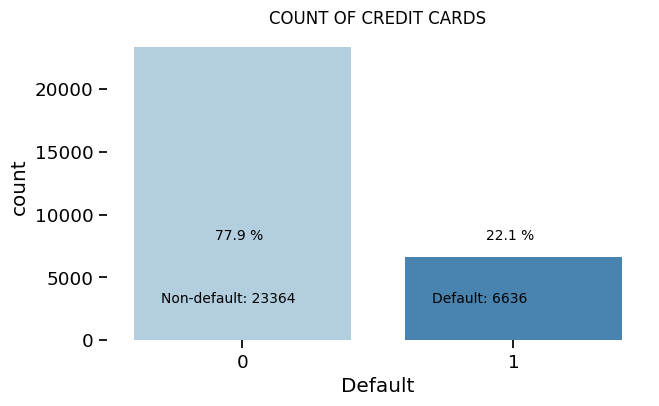

In [ ]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(x= 'Default', data= data,  palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=10)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=10)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=10)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=10)
plt.title('COUNT OF CREDIT CARDS', size=12)
#Removing the frame
plt.box(False);

**Finding the number of clients in each age group**




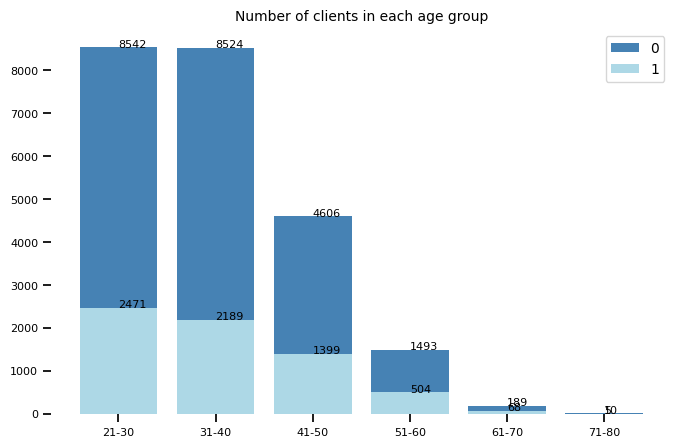

In [ ]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['Default'] == 0].value_counts())
age_1 = (data.AGE_BIN[data['Default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
#sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color= 'steelblue')
plt.bar(age_1.index, age_1.values, label='1', color= 'lightblue')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=8)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Number of clients in each age group", fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.box(False)
plt.show()

**Frequency of explanatory variables by defaulted and non-defaulted cards**

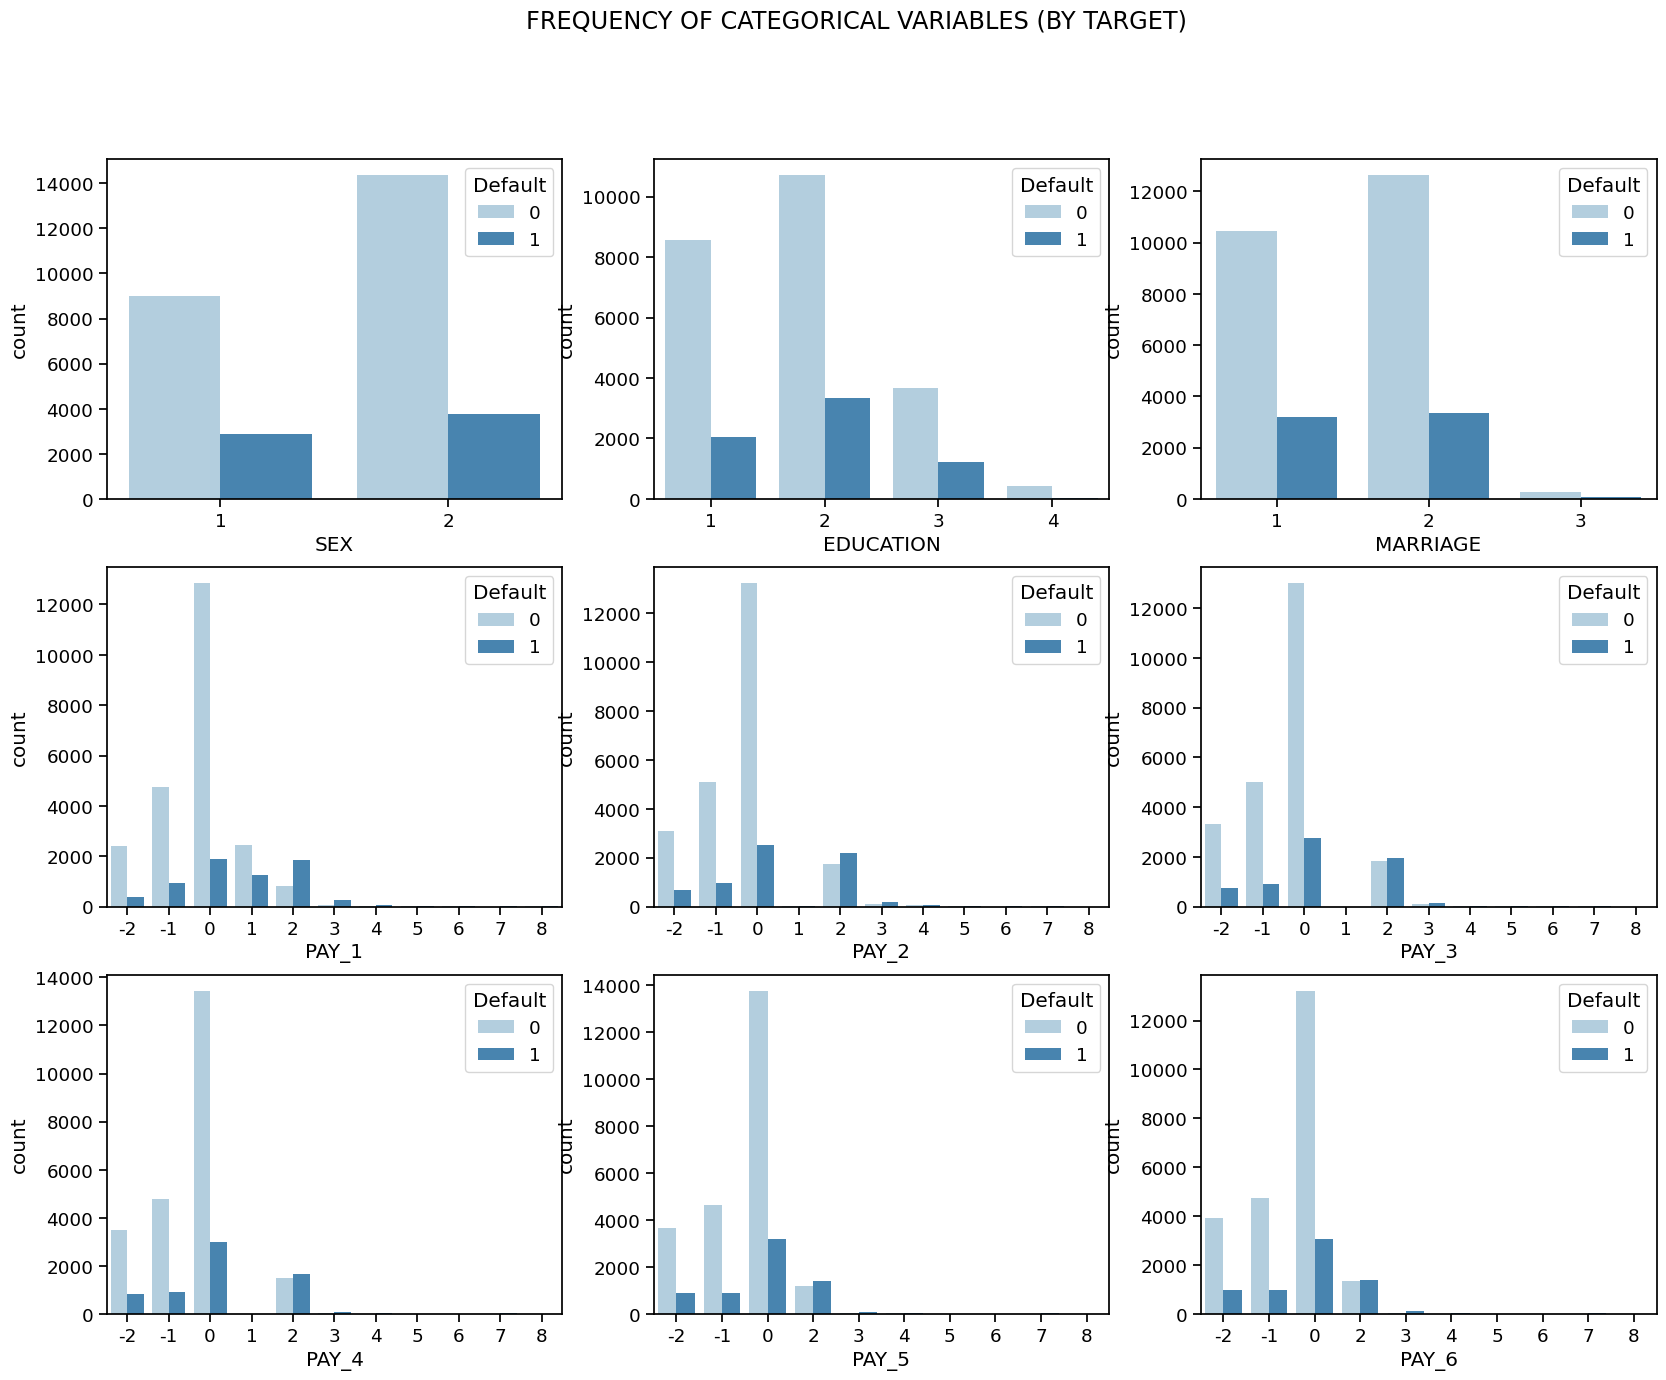

In [ ]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

**Plotting the limit balance based on type of credit card**

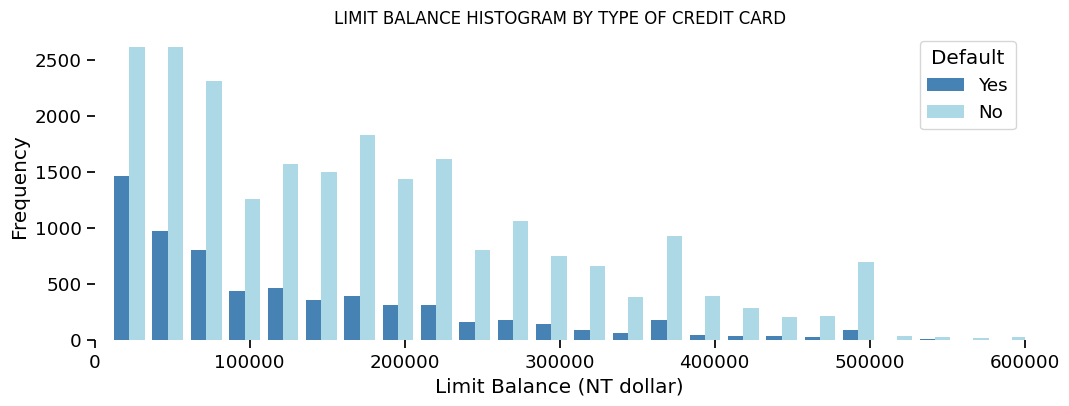

In [ ]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', fontsize=12)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

**Plotting the box plots to understand data distribution**

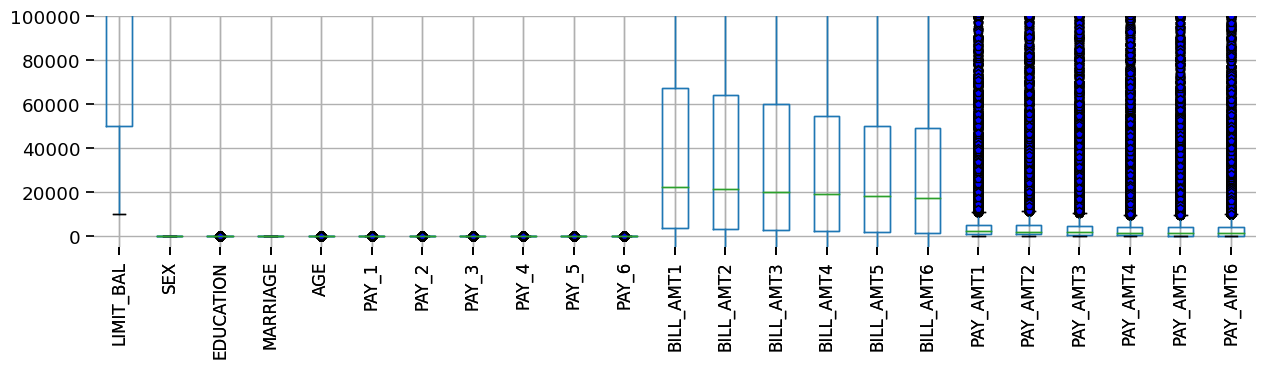

In [ ]:
plt.figure(figsize=(15,3))
ax= data.drop('Default', axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

**Plotting the correlation matrix** 

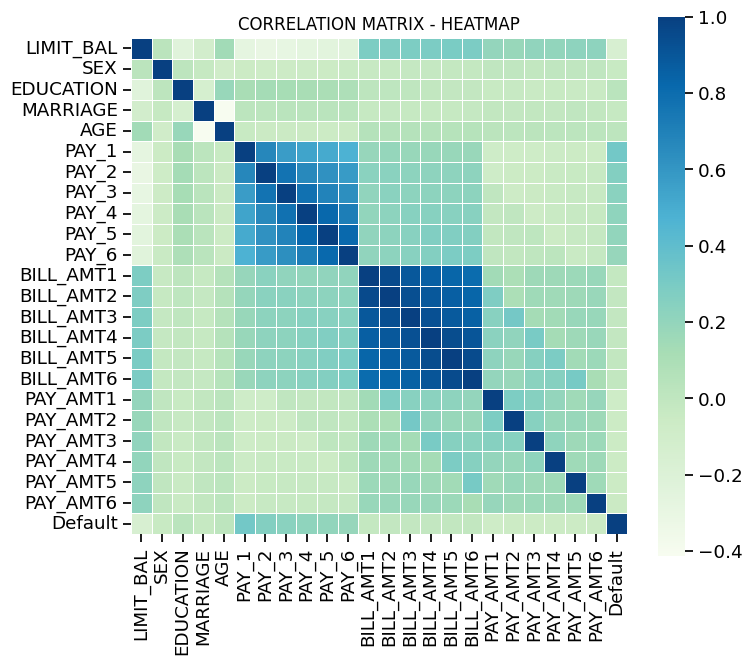

In [ ]:
corr = data.corr()
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="GnBu", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=12);

The only feature with a notable positive correlation with the dependent variable ‘Default’ is re-payment status during the last month (September). The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default. It can also be observed that some variables are highly correlated to each other, that is the case of the amount of bill statement and the repayment status in different months.

**Fitting correlated and uncorrelated data via linear regression**



Uncorrelated data are poentially more useful: discrimentory!


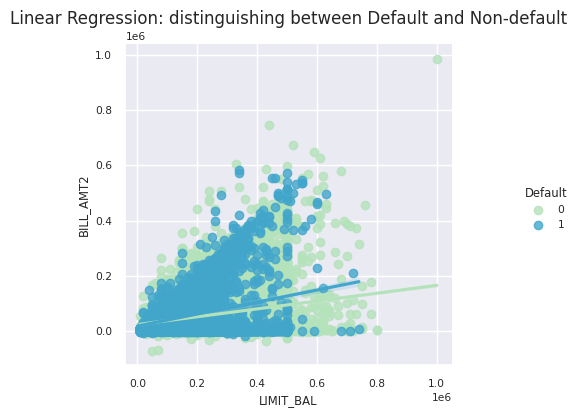

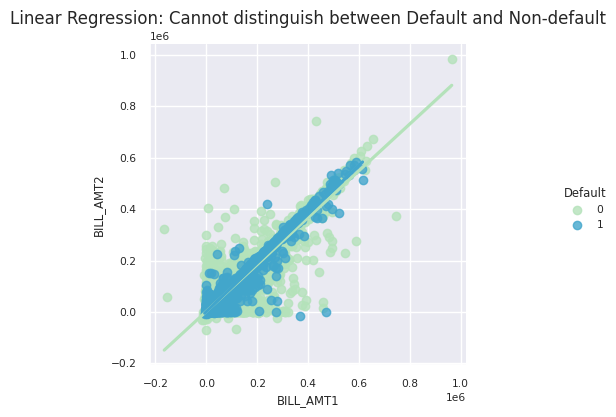

In [ ]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = data, hue ='Default', palette='GnBu', height= 4, aspect= 1)
plt.title('Linear Regression: distinguishing between Default and Non-default', size=12)

print("")
print("")
sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = data, hue ='Default', palette='GnBu', height =4, aspect= 1)
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=12);

print('Uncorrelated data are poentially more useful: discriminatory!')

####Building & Training Models

**Splitting the data into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Default', 'AGE_BIN'], axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Specifying the models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

models = {"Random_Forest" : RandomForestClassifier(),
          "Logistic_Regression" : LogisticRegression(), 
          "Ridge_Classfier" : RidgeClassifier(), 
          "K_Nearest_Neighbors" : KNeighborsClassifier(n_neighbors=2),
          "Support_Vector_Machine" : SVC(kernel="rbf", C=0.025, probability=True),
          "Linear_Discriminant_Analysis" : LinearDiscriminantAnalysis(),
          "Decision_Tree_Classifier": DecisionTreeClassifier()}

**Training the models**

In [ ]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Random_Forest training started...
Random_Forest trained.
Logistic_Regression training started...
Logistic_Regression trained.
Ridge_Classfier training started...
Ridge_Classfier trained.
K_Nearest_Neighbors training started...
K_Nearest_Neighbors trained.
Support_Vector_Machine training started...
Support_Vector_Machine trained.
Linear_Discriminant_Analysis training started...
Linear_Discriminant_Analysis trained.
Decision_Tree_Classifier training started...
Decision_Tree_Classifier trained.


####Model Evaluation

**Generating the accuracy score and log loss of respective models**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, log_loss

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for name in models:
  prediction = models.get(name).predict(X_test)
  acc_score = accuracy_score(y_test, prediction)
  lg_loss = log_loss(y_test, prediction)
  print("="*100)
  print(" ")
  print(f'{name} accuracy score :  {acc_score}')
  print(f'{name} log loss :  {lg_loss}')
  print(" ")

  log_entry = pd.DataFrame([[name, acc_score*100, lg_loss]], columns=log_cols)
  log = log.append(log_entry)

 
Random_Forest accuracy score :  0.8145
Random_Forest log loss :  6.686097703681232
 
 
Logistic_Regression accuracy score :  0.7811666666666667
Logistic_Regression log loss :  7.887552816651804
 
 
Ridge_Classfier accuracy score :  0.7978333333333333
Ridge_Classfier log loss :  7.286825260166518
 
 
K_Nearest_Neighbors accuracy score :  0.764
K_Nearest_Neighbors log loss :  8.506302199831648
 
 
Support_Vector_Machine accuracy score :  0.7811666666666667
Support_Vector_Machine log loss :  7.887552816651804
 
 
Linear_Discriminant_Analysis accuracy score :  0.8096666666666666
Linear_Discriminant_Analysis log loss :  6.860308695061964
 
 
Decision_Tree_Classifier accuracy score :  0.7246666666666667
Decision_Tree_Classifier log loss :  9.924019233136923
 


**Plotting the accuracy score and loss**

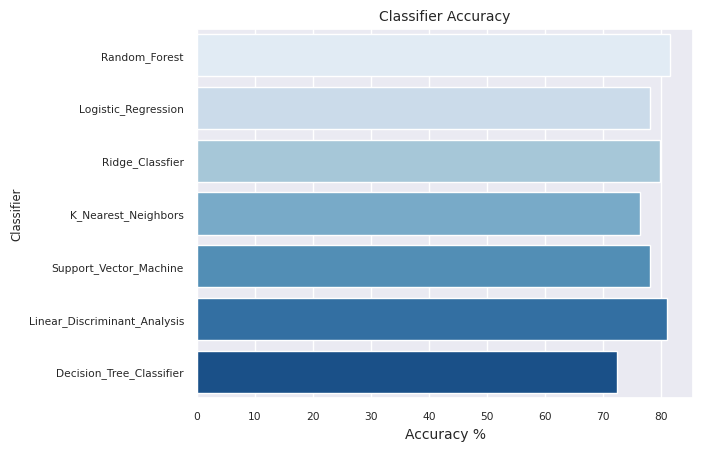

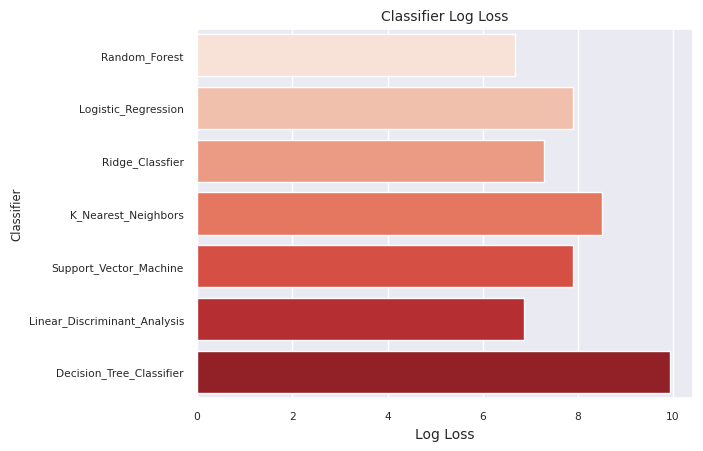

In [ ]:
sns.set(font_scale=0.7)

sns.set_color_codes("pastel")
sns.barplot(x='Accuracy', y='Classifier', data=log, palette="Blues")

plt.xlabel('Accuracy %', fontsize= 10)
plt.title('Classifier Accuracy', fontsize= 10)
plt.show()

print(" ")

sns.set_color_codes("pastel")
sns.barplot(x='Log Loss', y='Classifier', data=log, palette="Reds")

plt.xlabel('Log Loss', fontsize= 10)
plt.title('Classifier Log Loss', fontsize= 10 )
plt.show()

**Generating the classification reports**

In [ ]:
for name in models:
    print(f'{name} CLASSIFICATION REPORT')
    print("-------------------------------")  
    print(classification_report(y_test,models.get(name).predict(X_test)))
    print(" ")

Random_Forest CLASSIFICATION REPORT
-------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

 
Logistic_Regression CLASSIFICATION REPORT
-------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

 
Ridge_Classfier CLASSIFICATION REPORT
-------------------------------
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.

**Generating the confusion matrices**

Random_Forest ConfusionMatrix
 


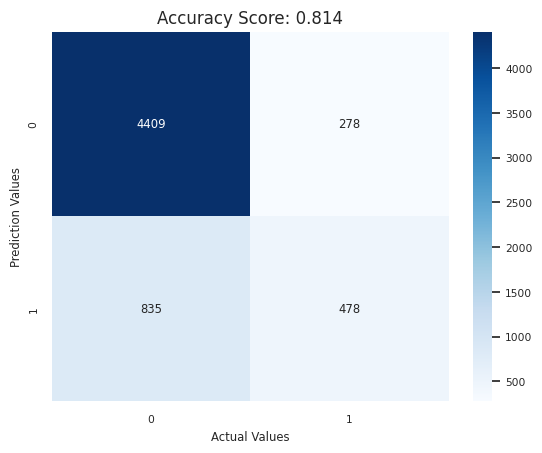

 
**********************************************
 
Logistic_Regression ConfusionMatrix
 


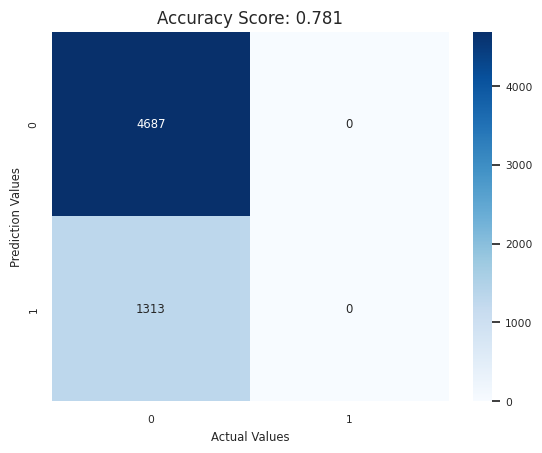

 
**********************************************
 
Ridge_Classfier ConfusionMatrix
 


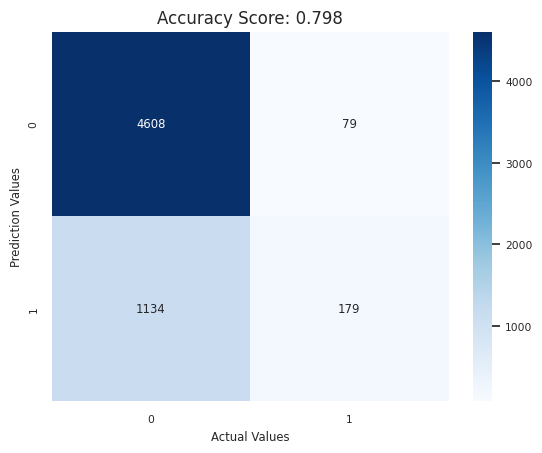

 
**********************************************
 
K_Nearest_Neighbors ConfusionMatrix
 


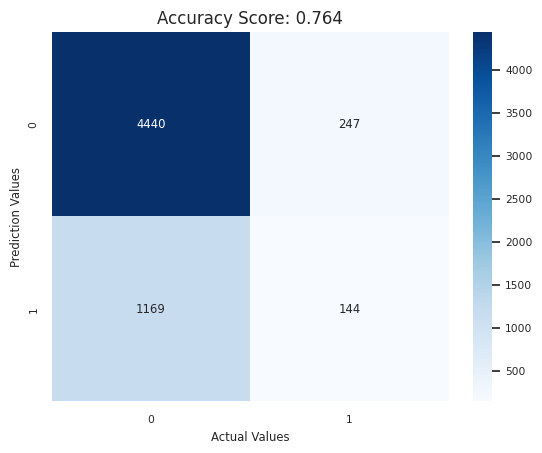

 
**********************************************
 
Support_Vector_Machine ConfusionMatrix
 


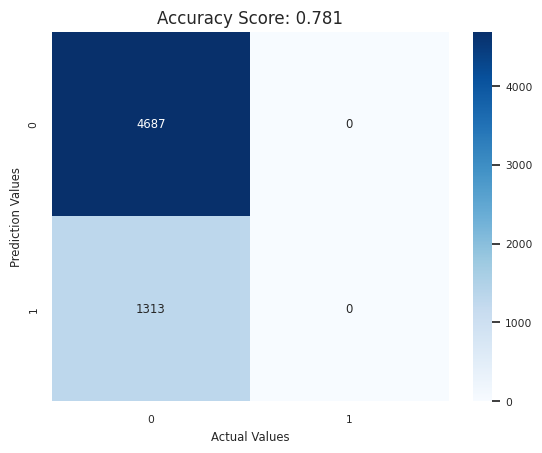

 
**********************************************
 
Linear_Discriminant_Analysis ConfusionMatrix
 


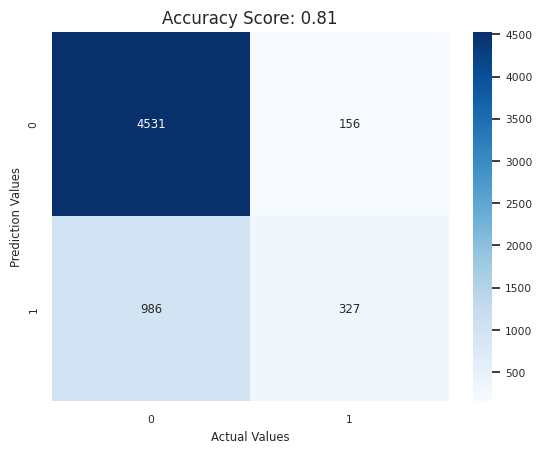

 
**********************************************
 
Decision_Tree_Classifier ConfusionMatrix
 


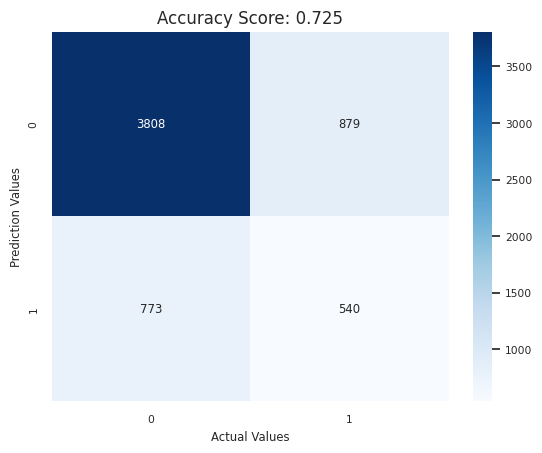

 
**********************************************
 


In [ ]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    print(" ")
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = confusion_matrix(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f", cmap="Blues")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 12)
    plt.show()
    print(" ")
    print("**********************************************")
    print(" ")

In [ ]:
#THANK YOU!!!!